# Delhi House Price Prediction 
- This is the project to pridict the price of the houses in Delhi in some popular localities based on the information provided in the data. It consist of 1259 rows and 11 columns
- The data is taken from the kaggle. You can visit the link to have a clear idea about the columns present in the dataset.

In [1]:
# liberaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Loading the set

In [2]:
data = pd.read_csv('MagicBricks.csv')
data

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [3]:
data.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


### Data Preprocessing

In [5]:
data.shape

(1259, 11)

In [6]:
data.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [7]:
# Fill the nan values
data['Per_Sqft'].fillna(data['Price']/data['Area'], inplace = True)
data['Parking'].fillna(data['Parking'].mode()[0], inplace = True)
data.dropna(inplace= True)

In [8]:
data.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [9]:
data.dtypes

Area           float64
BHK              int64
Bathroom       float64
Furnishing      object
Locality        object
Parking        float64
Price            int64
Status          object
Transaction     object
Type            object
Per_Sqft       float64
dtype: object

In [10]:
data.nunique()

Area           315
BHK              8
Bathroom         7
Furnishing       3
Locality       363
Parking          9
Price          284
Status           2
Transaction      2
Type             2
Per_Sqft       430
dtype: int64

In [11]:
# data type of both the columns shoult be int instead of float
data[['Parking', 'Bathroom']] = data[['Parking', 'Bathroom']].astype('int64')

In [12]:
# adding column haveing area in yards for better understanding
data['Area_Yards'] = data['Area']/9
data.drop(['Area'] , axis = 1 , inplace=True)

In [13]:
data['Locality'].value_counts().sort_values(ascending= False).head(20)

Locality
Lajpat Nagar 3                                                  34
J R Designers Floors, Rohini Sector 24                          31
Lajpat Nagar 2                                                  31
Kailash Colony, Greater Kailash                                 30
Yamuna Vihar, Shahdara                                          29
Laxmi Nagar                                                     25
Mehrauli                                                        24
Chittaranjan Park                                               24
Saket                                                           21
Alaknanda                                                       20
DDA Flats Sarita Vihar, Sarita Vihar, Mathura Road              19
Safdarjung Enclave                                              18
Chhattarpur                                                     17
Sheikh Sarai Phase 1                                            17
The Amaryllis, Karol Bagh                            

As there is large number of localities so for the sake of simplicity i am just grouping the locality that are on top together and rest in others

In [14]:

def grp_local(locality):
 locality = locality.lower() # avoid case sensitive
 if 'rohini' in locality:
    return 'Rohini Sector'
 elif 'dwarka' in locality:
    return 'Dwarka Sector'
 elif 'shahdara' in locality:
    return 'Shahdara'
 elif 'vasant' in locality:
    return 'Vasant Kunj'
 elif 'paschim' in locality:
    return 'Paschim Vihar'
 elif 'alaknanda' in locality:
    return 'Alaknanda'
 elif 'vasundhar' in locality:
    return 'Vasundhara Enclave'
 elif 'punjabi' in locality:
    return 'Punjabi Bagh'
 elif 'kalkaji' in locality:
    return 'Kalkaji'
 elif 'lajpat' in locality:
    return 'Lajpat Nagar'
 else:
    return 'Other'

In [15]:
data['Locality'] = data['Locality'].apply(grp_local)

In [16]:
data['Locality'].value_counts()

Locality
Other                 715
Lajpat Nagar           88
Dwarka Sector          87
Rohini Sector          75
Shahdara               71
Alaknanda              58
Vasant Kunj            35
Kalkaji                32
Punjabi Bagh           31
Paschim Vihar          30
Vasundhara Enclave     30
Name: count, dtype: int64

In [17]:
# computing zscore and then droping the outliers from the data
from scipy import stats
z = np.abs(stats.zscore(data[data.dtypes[data.dtypes != 'object'].index]))
data = data[(z<3).all(axis = 1)]

In [18]:
data.describe()

,BHK,Bathroom,Parking,Price,Per_Sqft,Area_Yards
count,1182.000000,1182.000000,1182.000000,1.182000e+03,1182.000000,1182.000000
mean,2.736887,2.485618,1.412860,1.855359e+07,12564.172327,144.045426
std,0.855906,0.954181,0.721348,1.776801e+07,8242.910657,83.466194
min,1.000000,1.000000,1.000000,1.000000e+06,1250.000000,3.111111
25%,2.000000,2.000000,1.000000,5.502500e+06,6526.000000,88.888889
50%,3.000000,2.000000,1.000000,1.360000e+07,10943.000000,127.777778
75%,3.000000,3.000000,2.000000,2.490000e+07,16448.651235,177.777778
max,5.000000,5.000000,10.000000,9.300000e+07,72000.000000,580.000000


In [19]:
data.head()

,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,Area_Yards
0,3,2,Semi-Furnished,Rohini Sector,1,6500000,Ready_to_move,New_Property,Builder_Floor,8125.0,88.888889
1,2,2,Semi-Furnished,Rohini Sector,1,5000000,Ready_to_move,New_Property,Apartment,6667.0,83.333333
2,2,2,Furnished,Rohini Sector,1,15500000,Ready_to_move,Resale,Apartment,6667.0,105.555556
3,2,2,Semi-Furnished,Rohini Sector,1,4200000,Ready_to_move,Resale,Builder_Floor,6667.0,66.666667
4,2,2,Semi-Furnished,Rohini Sector,1,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0,72.222222


### Exploratory Data Analysis

C:\Users\Dell\AppData\Local\Temp\ipykernel_1320\1823769016.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


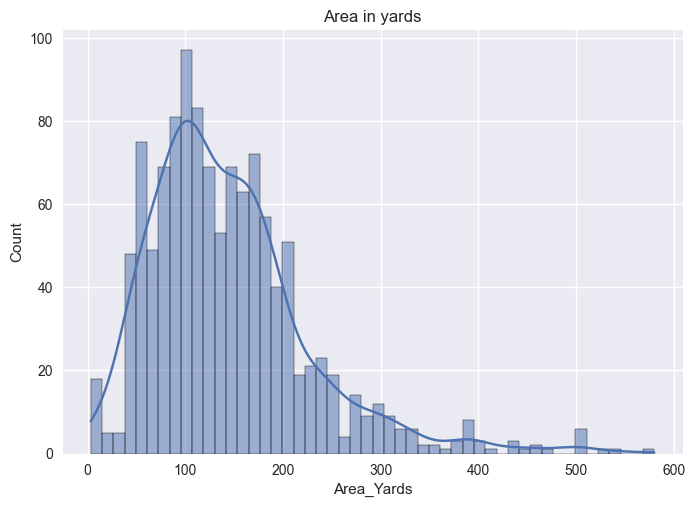

In [20]:
plt.style.use('seaborn')
sns.histplot(x = data['Area_Yards'], kde = True, bins = 50)
plt.title('Area in yards')
plt.show()

- Above distribution of area give the idea that most of the houses are having area in between 80 to 200sq yards. The distribution state most of the houses are small.

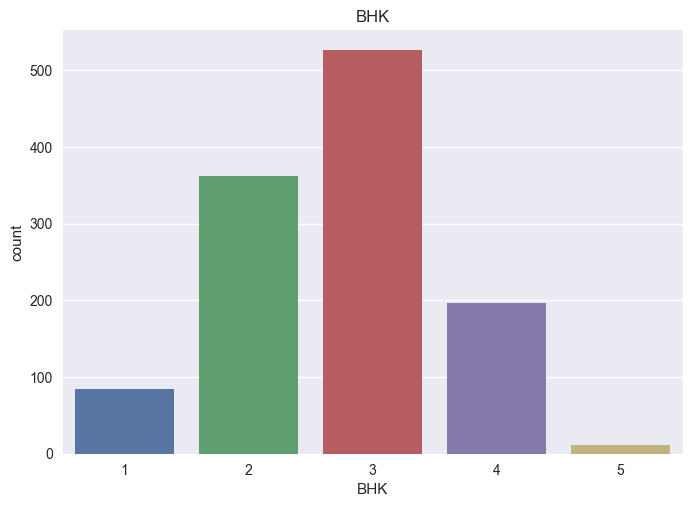

In [21]:
sns.countplot(x = 'BHK', data = data)
plt.title('BHK')
plt.show()

- Give the idea that 3BHk houses are higher in number then comes 2 ,4 . This clearly give the idea that houses are for the small family , couples and the studens that shared 2BHK

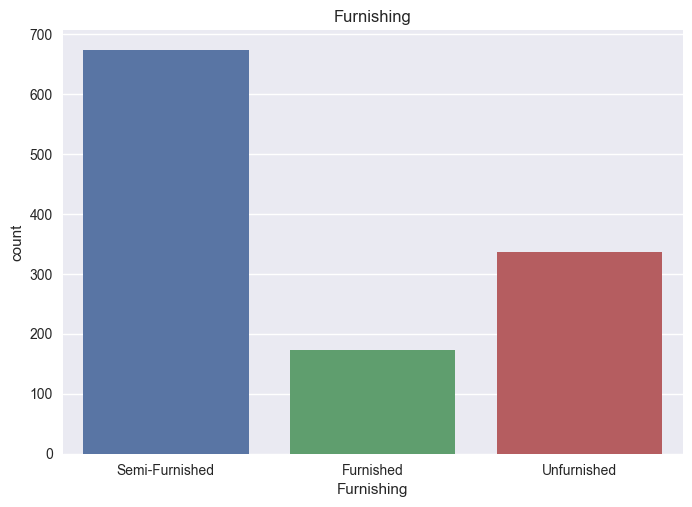

In [22]:
sns.countplot(x = 'Furnishing', data = data)
plt.title("Furnishing")
plt.show()

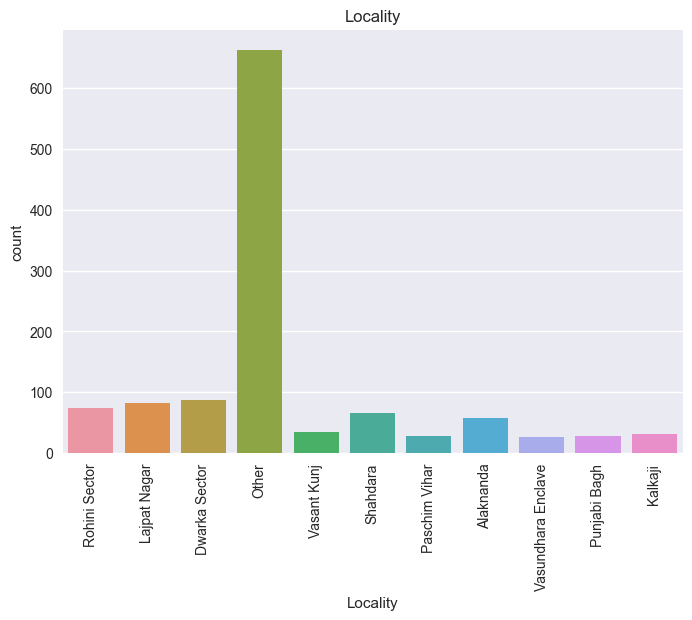

In [23]:
sns.countplot(x = 'Locality', data = data)
plt.title('Locality')
plt.xticks(rotation = 90)
plt.show()

- Since there are so many localities ans address in the dataset, I have group nearly half of them in the top ten localities (count wise), and the remaining localities are grouped as 'Others'. Upon visualizing the locality on the graph, we can se that after the 'Other'category, the Dwarka Sector has highest number of houses followed by Lajpat Naagr and Rohini Sector. From this info, I assume that these localities aare good to settle in Delhi. In addition to that localities such as Shahdara and Alaknanda are have significant number of houses as well. So, these localities are also good to settle in Delhi.

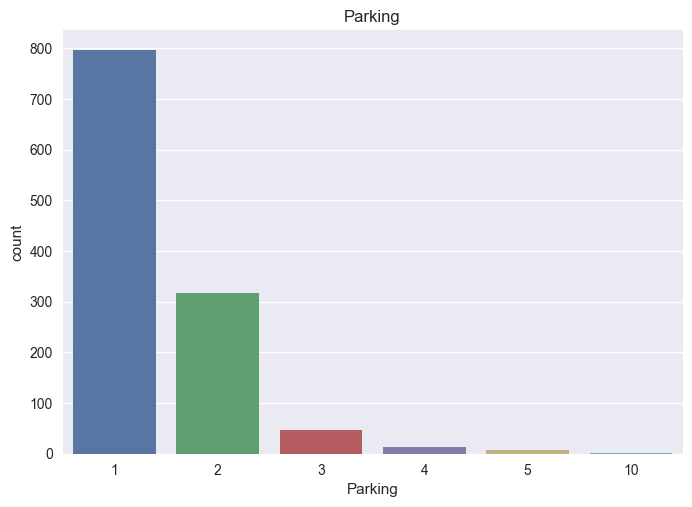

In [24]:
sns.countplot(x = 'Parking', data = data)
plt.title('Parking')
plt.show()

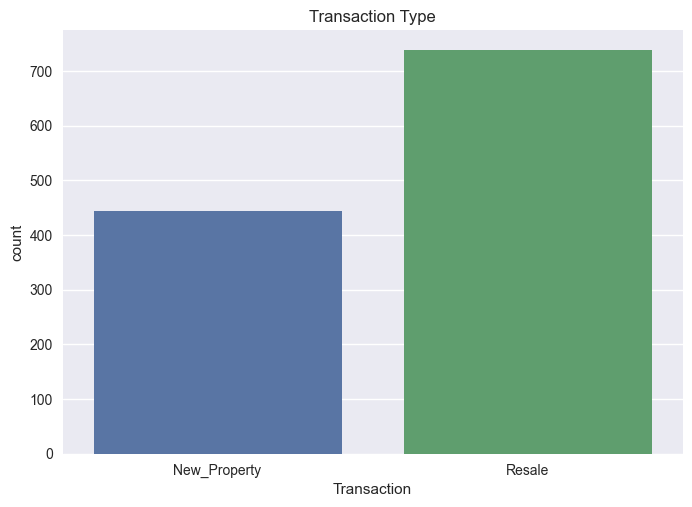

In [25]:
sns.countplot(x = 'Transaction', data = data)
plt.title('Transaction Type')
plt.show()

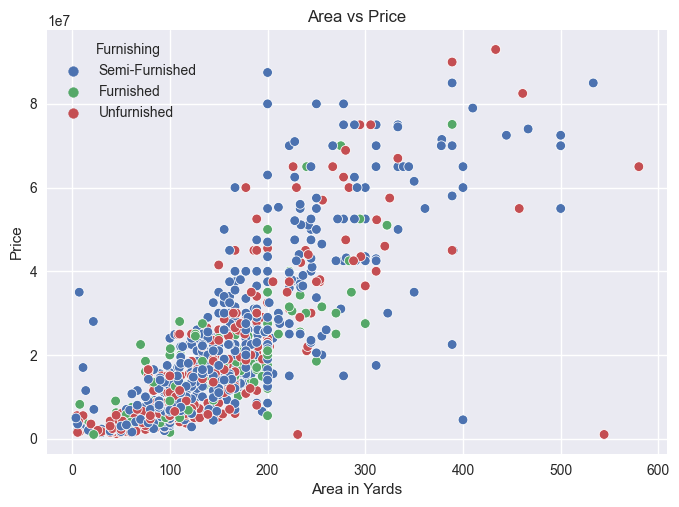

In [26]:
sns.scatterplot(x = 'Area_Yards', y = 'Price', data = data , hue = 'Furnishing')
plt.title('Area vs Price')
plt.xlabel('Area in Yards')
plt.ylabel('Price')
plt.show()

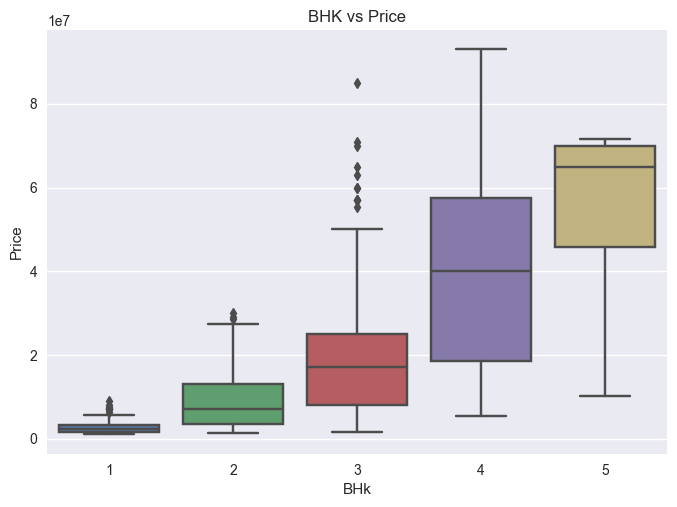

In [27]:
sns.boxplot(x = 'BHK', y = 'Price', data = data)
plt.title('BHK vs Price')
plt.xlabel('BHk')
plt.ylabel('Price')
plt.show()

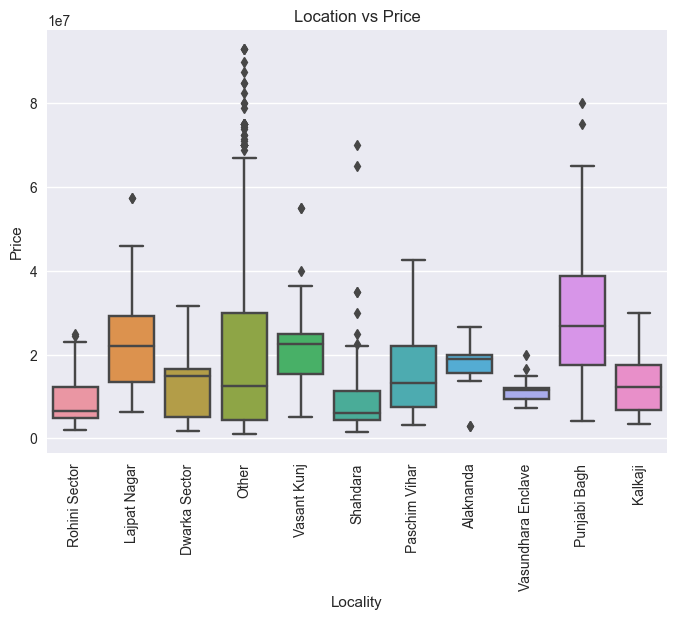

In [28]:
sns.boxplot(x = 'Locality', y = 'Price', data = data)
plt.title('Location vs Price')
plt.xticks(rotation = 90)
plt.xlabel('Locality')
plt.ylabel('Price')
plt.show()

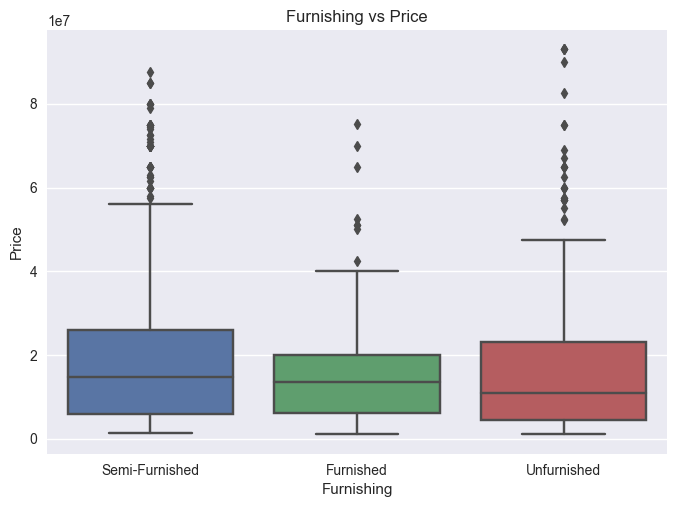

In [29]:
sns.boxplot(x = 'Furnishing', y = 'Price', data = data)
plt.title('Furnishing vs Price')
plt.xlabel('Furnishing')
plt.ylabel('Price')
plt.show()

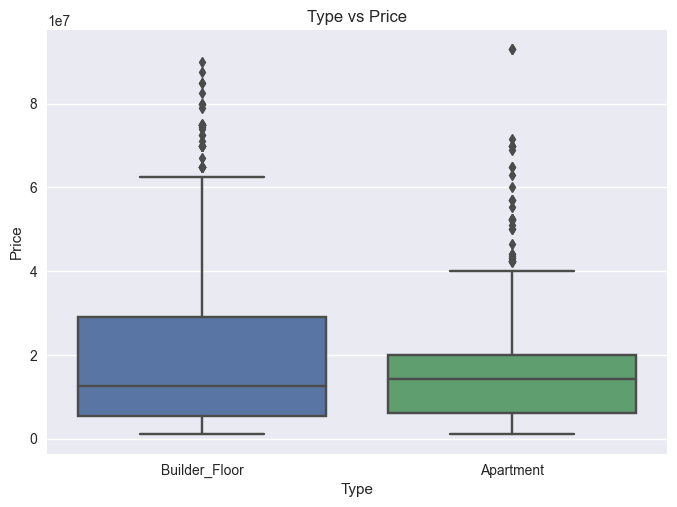

In [30]:
sns.boxplot(x = 'Type', y = 'Price', data = data)
plt.title('Type vs Price')
plt.xlabel('Type')
plt.ylabel('Price')
plt.show()

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cols = ['Furnishing', 'Locality', 'Status', 'Transaction', 'Type']
for i in cols:
    le.fit(data.loc[:,i])
    data.loc[:,i] = le.fit_transform(data.loc[:,i])
    

In [32]:
data.head(3)

,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,Area_Yards
0,3,2,1,7,1,6500000,1,0,1,8125.0,88.888889
1,2,2,1,7,1,5000000,1,0,0,6667.0,83.333333
2,2,2,0,7,1,15500000,1,1,0,6667.0,105.555556


In [33]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
cols = ['Price', 'Area_Yards']
std.fit(data.loc[:,cols])
data.loc[:, cols] = std.transform(data.loc[:,cols])

In [34]:
data.head(5)

,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,Area_Yards
0,3,2,1,7,1,-0.678674,1,0,1,8125.0,-0.661105
1,2,2,1,7,1,-0.763131,1,0,0,6667.0,-0.727693
2,2,2,0,7,1,-0.171931,1,1,0,6667.0,-0.461338
3,2,2,1,7,1,-0.808175,1,1,1,6667.0,-0.927459
4,2,2,1,7,1,-0.695566,1,0,1,6667.0,-0.860871


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1182 entries, 0 to 1257
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BHK          1182 non-null   int64  
 1   Bathroom     1182 non-null   int64  
 2   Furnishing   1182 non-null   object 
 3   Locality     1182 non-null   object 
 4   Parking      1182 non-null   int64  
 5   Price        1182 non-null   float64
 6   Status       1182 non-null   object 
 7   Transaction  1182 non-null   object 
 8   Type         1182 non-null   object 
 9   Per_Sqft     1182 non-null   float64
 10  Area_Yards   1182 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 110.8+ KB


<Axes: >

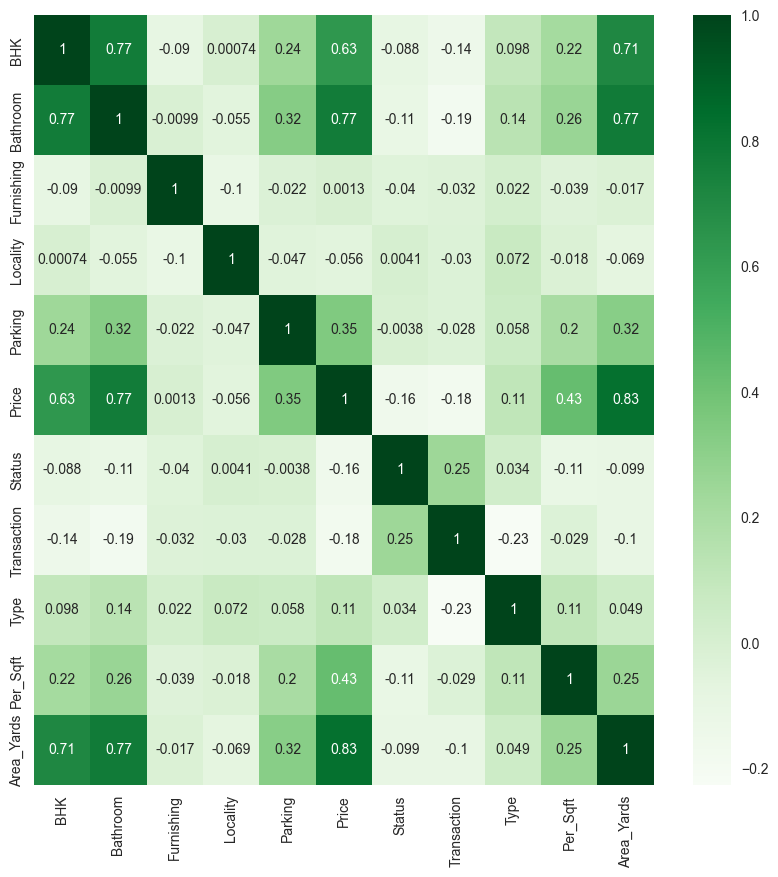

In [36]:
plt.figure(figsize= (10,10))
sns.heatmap(data.corr(), annot = True , cmap = 'Greens')

In [37]:
data.drop(['Per_Sqft'],axis = 1, inplace= True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_1320\1730006095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['Per_Sqft'],axis = 1, inplace= True)


In [38]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(data.drop('Price', axis = 1), data['Price'] , test_size= 0.3, random_state= 32
                                                    )

In [39]:
# Price Prediction
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train , y_train )

LinearRegression()

In [40]:
model.score(X_train, y_train)

0.7257909290884028

In [41]:
y_pred = model.predict(X_test)

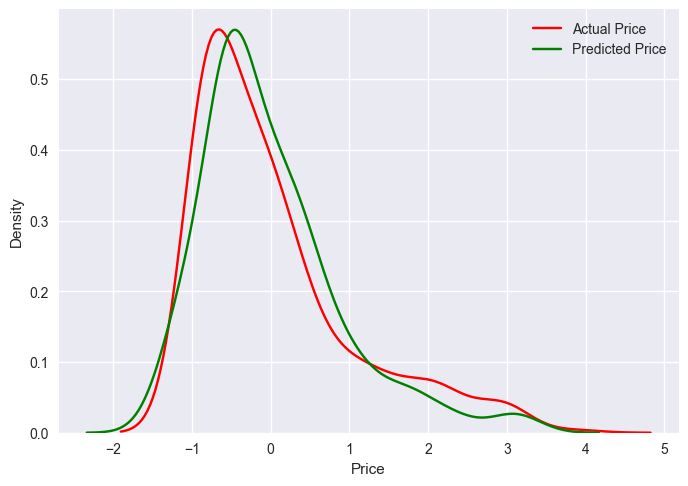

In [42]:
ax = sns.kdeplot(y_test, color = 'r' , label = 'Actual Price')
sns.kdeplot(y_pred, color = 'g' ,ax = ax, label = 'Predicted Price')
plt.legend()
plt.show()

In [43]:
from sklearn.metrics import r2_score, mean_squared_error 
print("Mean Squared Error: " , mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error:  0.2450188914428168
R2 Score:  0.7615527349928969
Root Mean Squared Error:  0.4949938297017618


In [44]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

In [45]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [46]:
rfr.score(X_train, y_train)

0.9633538999145983

In [47]:
rfr_pred = rfr.predict(X_test)

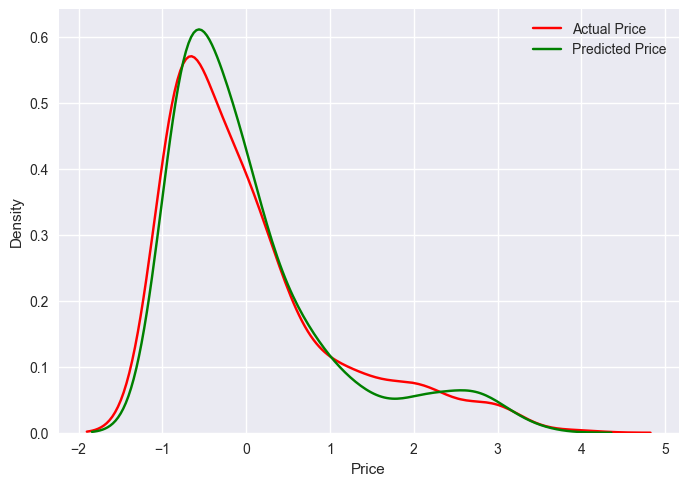

In [48]:
ax = sns.kdeplot(y_test, color = 'r' , label = 'Actual Price')
sns.kdeplot(rfr_pred, color = 'g' ,ax = ax, label = 'Predicted Price')
plt.legend()
plt.show()

In [49]:
from sklearn.metrics import r2_score, mean_squared_error 
print("Mean Squared Error: " , mean_squared_error(y_test, rfr_pred))
print("R2 Score: ", r2_score(y_test, rfr_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, rfr_pred)))

Mean Squared Error:  0.16810585246535523
R2 Score:  0.8364028972786103
Root Mean Squared Error:  0.41000713709075265
